In [9]:
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

## 📊 Painel Básico - Para o Público Geral

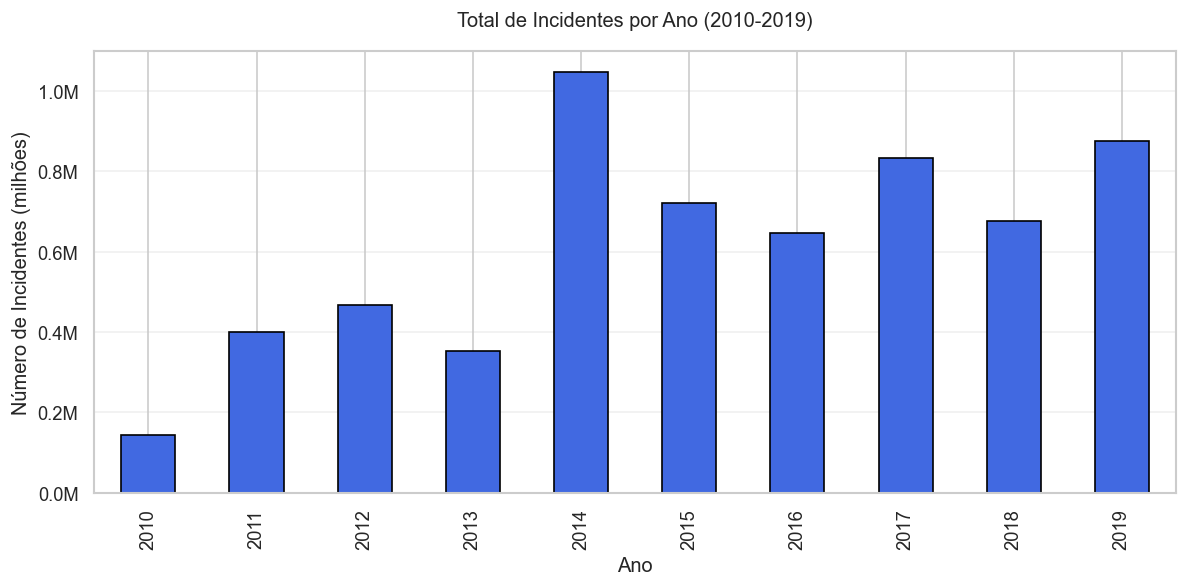

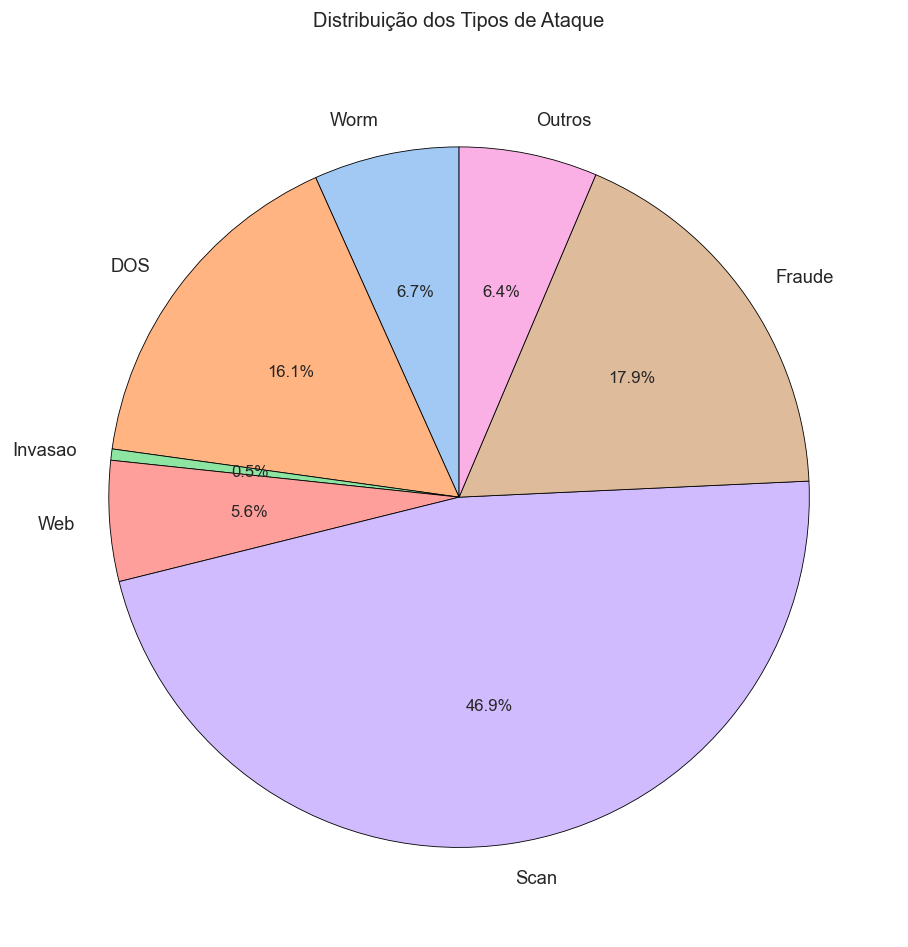

In [13]:
plt.figure(figsize=(10, 5))
df.groupby('Ano')['Total'].sum().plot(
    kind='bar', 
    color='royalblue',
    edgecolor='black'
)
plt.title('Total de Incidentes por Ano (2010-2019)', pad=15)
plt.xlabel('Ano')
plt.ylabel('Número de Incidentes (milhões)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/plots/basic_annual.png')
plt.show()

# %%
# Gráfico 2: Distribuição por Tipo de Ataque (Pizza)
attack_totals = df[['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros']].sum()
plt.figure(figsize=(8, 8))
plt.pie(
    attack_totals,
    labels=attack_totals.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title('Distribuição dos Tipos de Ataque', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/plots/basic_pie.png')
plt.show()

## 📈 Painel Intermediário - Para Gestores

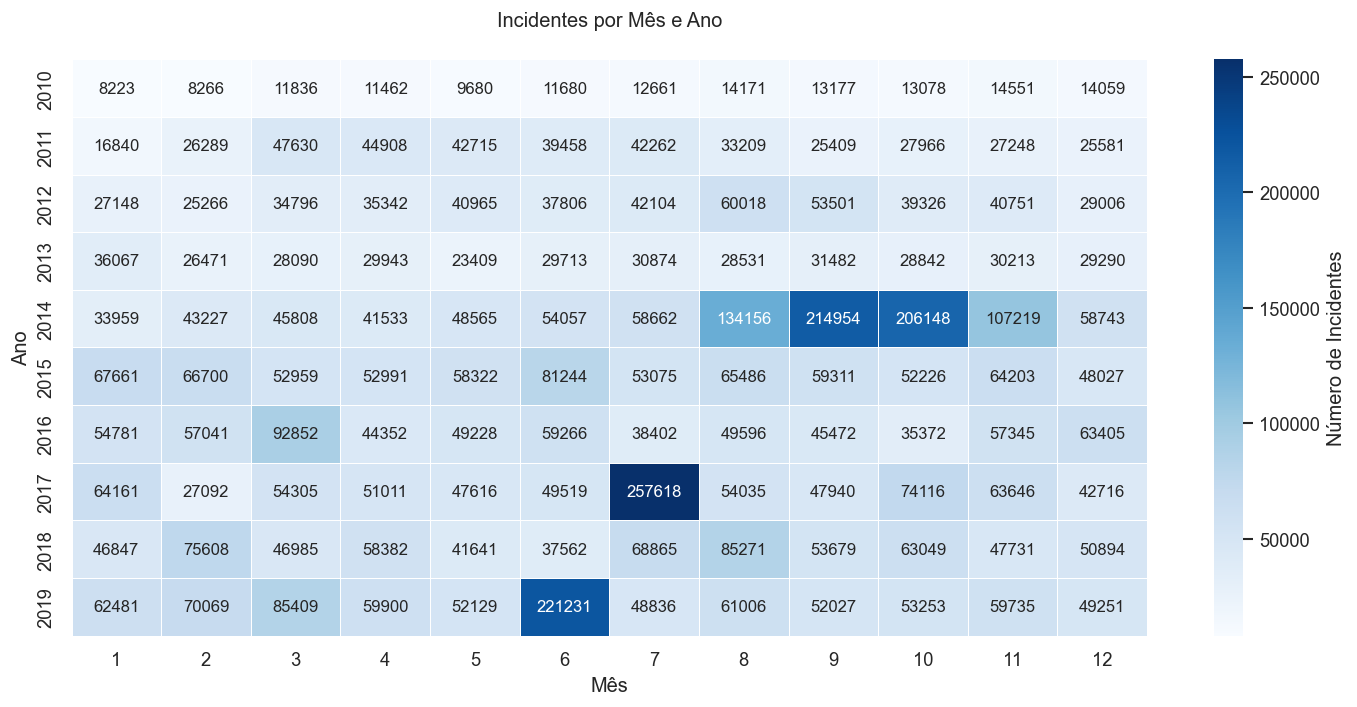

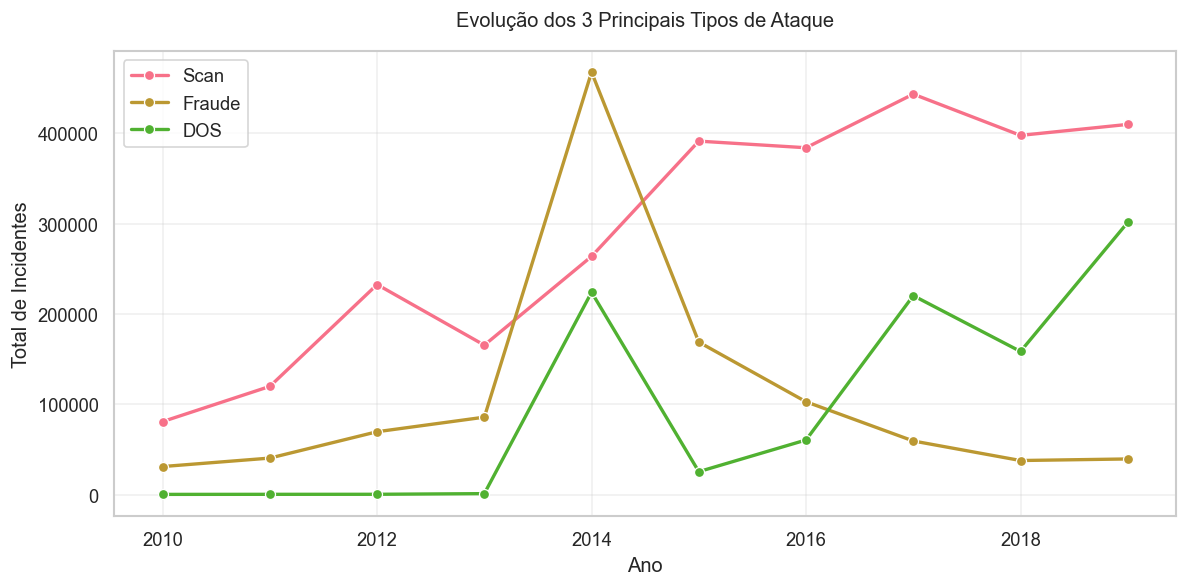

In [11]:
# Gráfico 3: Tendência Mensal com Média Móvel
plt.figure(figsize=(12, 6))
monthly_data = df.groupby(['Ano', 'Mes_num'])['Total'].sum().unstack()
sns.heatmap(
    monthly_data,
    cmap='Blues',
    annot=True,
    fmt='.0f',
    linewidths=0.5,
    cbar_kws={'label': 'Número de Incidentes'}
)
plt.title('Incidentes por Mês e Ano', pad=20)
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.tight_layout()
plt.savefig('../visualizations/plots/manager_heatmap.png')
plt.show()

# %%
# Gráfico 4: Comparativo dos 3 Principais Ataques
top_attacks = df[['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros']].sum().nlargest(3).index
plt.figure(figsize=(10, 5))
for attack in top_attacks:
    sns.lineplot(
        data=df.groupby('Ano')[attack].sum(),
        label=attack,
        linewidth=2,
        marker='o'
    )
plt.title('Evolução dos 3 Principais Tipos de Ataque', pad=15)
plt.xlabel('Ano')
plt.ylabel('Total de Incidentes')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('../visualizations/plots/manager_top3.png')
plt.show()

## 🔍 Painel Avançado - Para Analistas

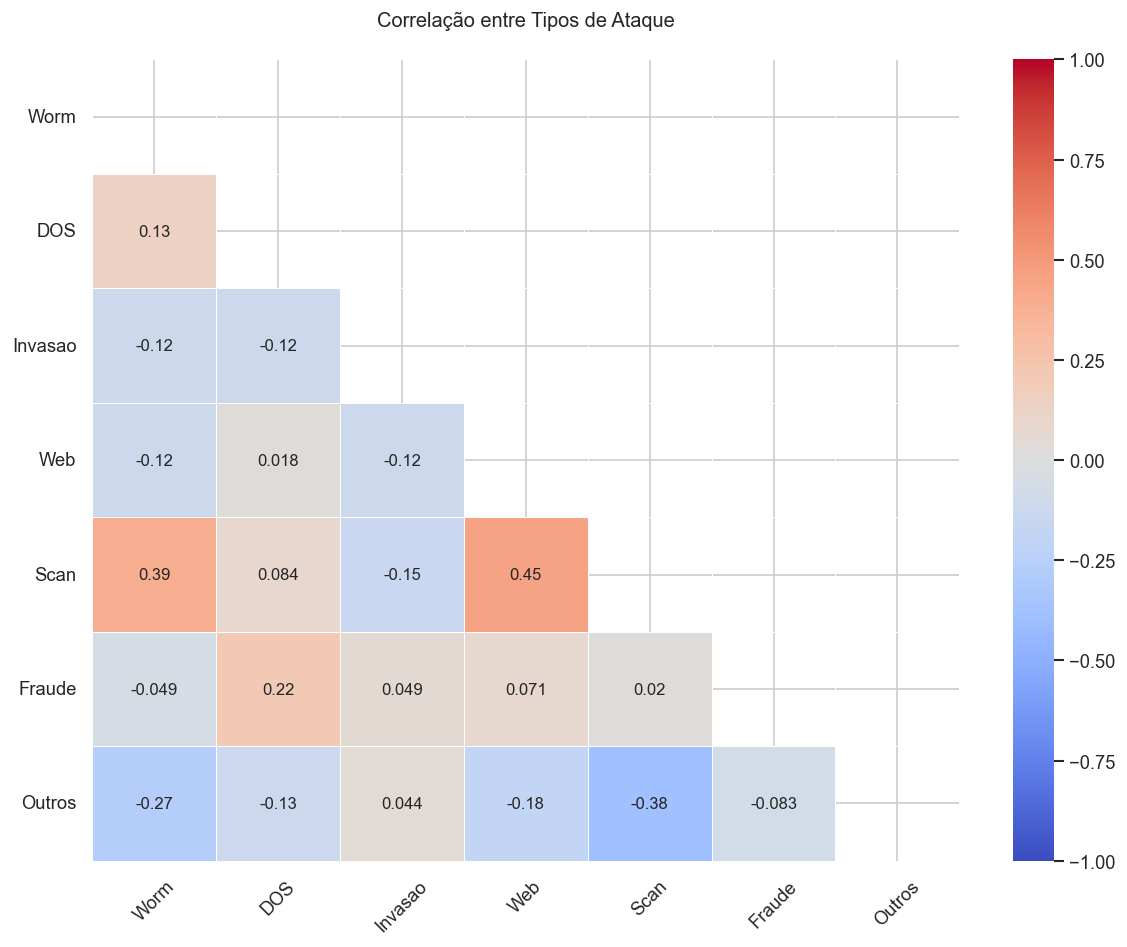

<Figure size 1440x720 with 0 Axes>

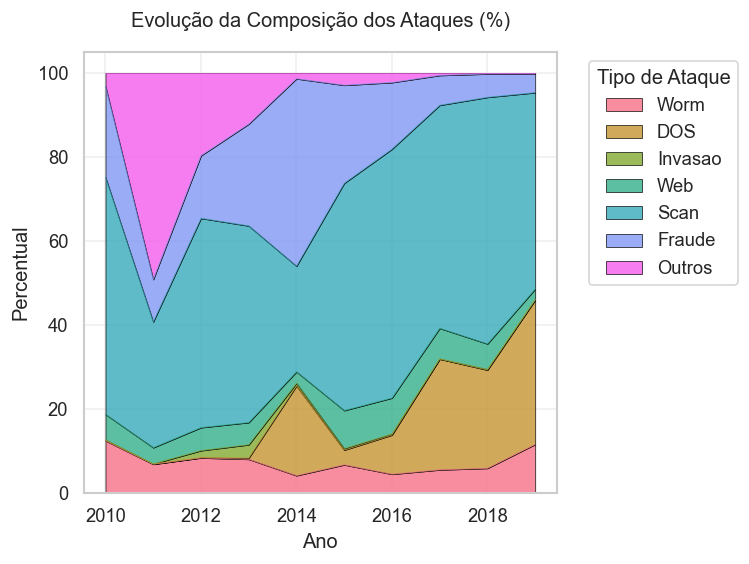

In [12]:
# Gráfico 5: Matriz de Correlação Completa (corrigido)
try:
    corr_matrix = df[['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        vmin=-1,
        vmax=1,
        mask=np.triu(np.ones_like(corr_matrix)),
        linewidths=0.5
    )
    plt.title('Correlação entre Tipos de Ataque', pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('../visualizations/plots/advanced_corr.png', bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erro ao gerar matriz de correlação: {str(e)}")

# %%
# Gráfico 6: Composição Percentual ao Longo dos Anos (versão corrigida)
try:
    attack_cols = ['Worm', 'DOS', 'Invasao', 'Web', 'Scan', 'Fraude', 'Outros']
    yearly_attack = df.groupby('Ano')[attack_cols].sum()
    yearly_pct = yearly_attack.div(yearly_attack.sum(axis=1), axis=0) * 100
    
    plt.figure(figsize=(12, 6))
    ax = yearly_pct.plot(
        kind='area',
        stacked=True,
        color=sns.color_palette('husl', len(attack_cols)),
        alpha=0.8,
        linewidth=0.5
    )
    
    # Adicionar bordas manualmente
    for collection in ax.collections:
        collection.set_edgecolor("black")
    
    plt.title('Evolução da Composição dos Ataques (%)', pad=15)
    plt.xlabel('Ano')
    plt.ylabel('Percentual')
    plt.legend(bbox_to_anchor=(1.05, 1), title='Tipo de Ataque')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('../visualizations/plots/advanced_composition.png', bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Erro ao gerar gráfico de composição: {str(e)}")